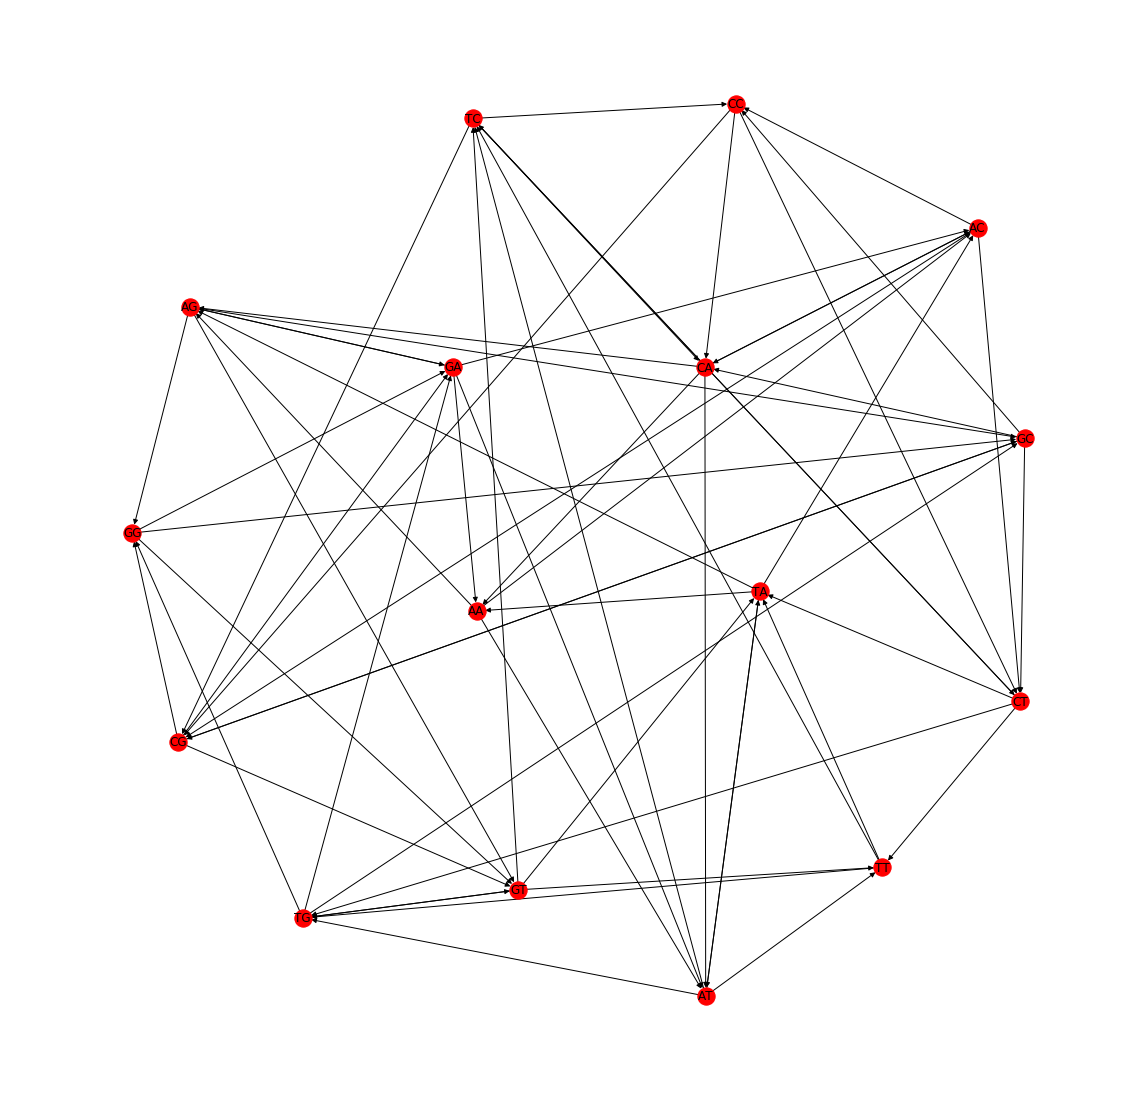

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

n = ["AA", "AC", "AG", "AT", "CA", "CC", "CG", "CT", "GA", "GC", "GG", "GT", "TA", "TC", "TG", "TT"]
            
def make_graph_dict(reads):
    graph = {}

    for a in reads:
        edges = []
        for b in reads:
            if a[1] == b[0]:
                edges.append(b)
                graph[a] = edges
                
    return graph           

def draw_graph(seq_graph):
    g = nx.DiGraph()
    g.add_nodes_from(seq_graph.keys())
    for k, v in seq_graph.items():
        g.add_edges_from(([(k, t) for t in v]))

    plt.figure(figsize=(15,15))
    nx.draw(g,with_labels=True)
    plt.draw()
    plt.show()
    return g

seq_graph = make_graph_dict(n)   
draw_graph(seq_graph)

In [14]:
def bokeh_visualize(graph):
    import networkx as nx

    from bokeh.io import show, output_file
    from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
    from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
    from bokeh.palettes import Spectral4

    plot = Plot(plot_width=400, plot_height=400,
                x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
    plot.title.text = "Overlap layout consensus"

    plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

    graph_renderer = from_networkx(graph, nx.circular_layout, scale=1, center=(0,0))

    graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
    graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
    graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

    graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
    graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
    graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

    graph_renderer.selection_policy = NodesAndLinkedEdges()
    graph_renderer.inspection_policy = EdgesAndLinkedNodes()

    plot.renderers.append(graph_renderer)

    output_file("interactive_graphs.html")
    show(plot)

bokeh_visualize(g)    

In [44]:
from collections import defaultdict
import random

def kmers(read, k=10):
    for n in range(len(read) - k + 1):
        yield read[n:n+k]
        
def make_de_bruijn_graph(string, k):
    k_mers = list(kmers(string, k))
    nodes = defaultdict(list)

    for kmer in k_mers:
        head = kmer[:-1]
        tail = kmer[1:]
        nodes[head].append(tail)
        
    return nodes

nodes = make_de_bruijn_graph("".join(random.choice("AGCT") for _ in range(1000)), 4)
draw_graph(nodes)

TypeError: 'type' object is not iterable